# Flight Fare Prediction

An airline is a company that provides air transport services for traveling passengers and freight. Airlines use aircraft to supply these services and may form partnerships or alliances with other airlines for codeshare agreements, in which they both offer and operate the same flight. Generally, airline companies are recognized with an air operating certificate or license issued by a governmental aviation body. Airlines may be scheduled or charter operators.

Airlines assign prices to their services in an attempt to maximize profitability. The pricing of airline tickets has become increasingly complicated over the years and is now largely determined by computerized yield management systems.

The price of an Airline Ticket is affected by a number of factors, such as flight duration, days left for departure, arrival time and departure time etc. Airline organizations may diminish the cost at the time they need to build the market and at the time when the tickets are less accessible. They may maximize the costs. The price may rely upon different factors. Each factor has its own proprietary rules and algorithms to set the price accordingly. Recent advances in Artificial Intelligence (AI) and Machine Learning (ML) makes it possible to infer such rules and model the price variation.

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [2]:
# Reading the dataset
df = pd.read_csv('Data_Train.csv')

In [3]:
# view the first 5 rows 
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,3/22/2022 1:10,2h 50m,non-stop,No info,3897
1,Air India,1/5/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/6/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,6/10/2022 4:25,19h,2 stops,No info,13882
3,IndiGo,12/5/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,1/3/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# getting the last 5 rows
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/4/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,8:20,11:20,3h,non-stop,No info,7229
10681,Vistara,1/3/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/5/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
# checking for duplicate values
df.duplicated().sum()

220

In [6]:
# checking the dimensions of the data
df.shape

(10683, 11)

In [7]:
# dropping duplicate values
df = df.drop_duplicates(keep = 'first')

In [8]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,3/22/2022 1:10,2h 50m,non-stop,No info,3897
1,Air India,1/5/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/6/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,6/10/2022 4:25,19h,2 stops,No info,13882
3,IndiGo,12/5/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,1/3/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
df.shape

(10463, 11)

In [10]:
# checking for null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
# dropping null values
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
df.describe(include='object')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10462,10462,10462,10462,10462,10462,10462,10462,10462,10462
unique,12,40,5,6,128,222,1343,368,5,10
top,Jet Airways,6/6/2019,Delhi,Cochin,DEL ? BOM ? COK,18:55,19:00,2h 50m,1 stop,No info
freq,3700,490,4345,4345,2376,233,412,544,5625,8182


In [14]:
# replacing ? in route column with -
df['Route'] = df['Route'].str.replace('?','-')

In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR - DEL,22:20,3/22/2022 1:10,2h 50m,non-stop,No info,3897
1,Air India,1/5/2019,Kolkata,Banglore,CCU - IXR - BBI - BLR,5:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/6/2019,Delhi,Cochin,DEL - LKO - BOM - COK,9:25,6/10/2022 4:25,19h,2 stops,No info,13882
3,IndiGo,12/5/2019,Kolkata,Banglore,CCU - NAG - BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,1/3/2019,Banglore,New Delhi,BLR - NAG - DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### handeling date time columns


In [16]:
# extracting day from date of journey
df['journey_day'] = pd.to_datetime(df.Date_of_Journey, format = "%d/%m/%Y").dt.day

In [17]:
# extracting month from date of journey
df['journey_month'] = pd.to_datetime(df.Date_of_Journey,format = "%d/%m/%Y").dt.month

In [18]:
# since we have collected the required information from the column let's drop it
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [19]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR - DEL,22:20,3/22/2022 1:10,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU - IXR - BBI - BLR,5:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL - LKO - BOM - COK,9:25,6/10/2022 4:25,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU - NAG - BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR - NAG - DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [20]:
# as per date time we can also extract values from dep hr colun
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour

In [21]:
# just like hour we can also extract minutes from dep hr
df['Dep_mins'] = pd.to_datetime(df['Dep_Time']).dt.minute 

In [22]:
df.drop(['Dep_Time'],axis=1,inplace=True)

In [23]:
# now we can extract hours and mins from the duration of the journey
duration = list(df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h "+duration[i]

duration_hours = []
duration_mins = []

In [24]:
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1]))

In [25]:
# seperating the hours and mins fron duration-hrs and adding them to data
df['duration_hours'] = duration_hours
df['duration_mins'] = duration_mins

In [26]:
# as we have gathered info from duration column now we can delete that column
df.drop(['Duration'],axis=1, inplace = True)

In [27]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_mins,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR - DEL,3/22/2022 1:10,non-stop,No info,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,CCU - IXR - BBI - BLR,13:15,2 stops,No info,7662,1,5,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL - LKO - BOM - COK,6/10/2022 4:25,2 stops,No info,13882,9,6,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU - NAG - BLR,23:30,1 stop,No info,6218,12,5,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR - NAG - DEL,21:35,1 stop,No info,13302,1,3,16,50,4,45


In [28]:
# extraccting values from arrival time
df['arrival_hour'] = pd.to_datetime(df.Arrival_Time).dt.hour
df['arrival_minute'] = pd.to_datetime(df.Arrival_Time).dt.minute

In [29]:
df.drop(['Arrival_Time'],axis=1, inplace= True)

# Visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

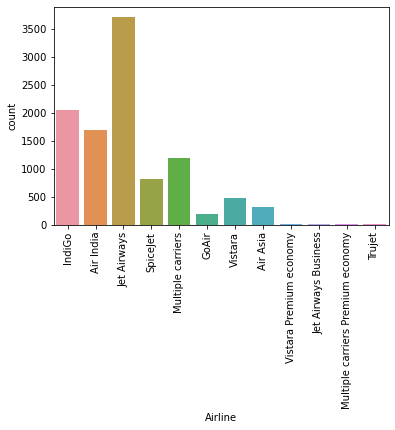

In [30]:
sns.countplot(x='Airline',data=df)
plt.xticks(rotation=90)

jet airways is mostly preffered airline by the passengers.

<AxesSubplot:xlabel='Source', ylabel='count'>

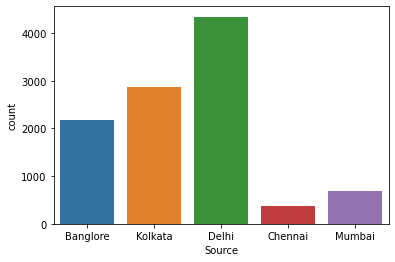

In [31]:
sns.countplot(x='Source',data=df)

delhi is the source of most of the passengers.

<AxesSubplot:xlabel='Destination', ylabel='count'>

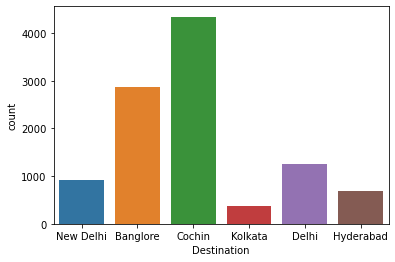

In [32]:
sns.countplot(x='Destination', data=df)

most of the passengers travel to Cochin

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

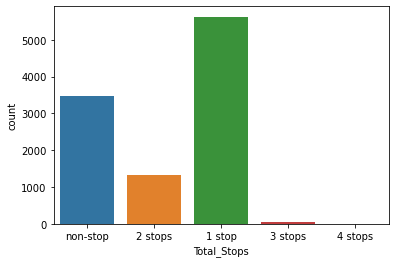

In [33]:
sns.countplot(x='Total_Stops',data=df)

most of the people like to travel 1 stop journey

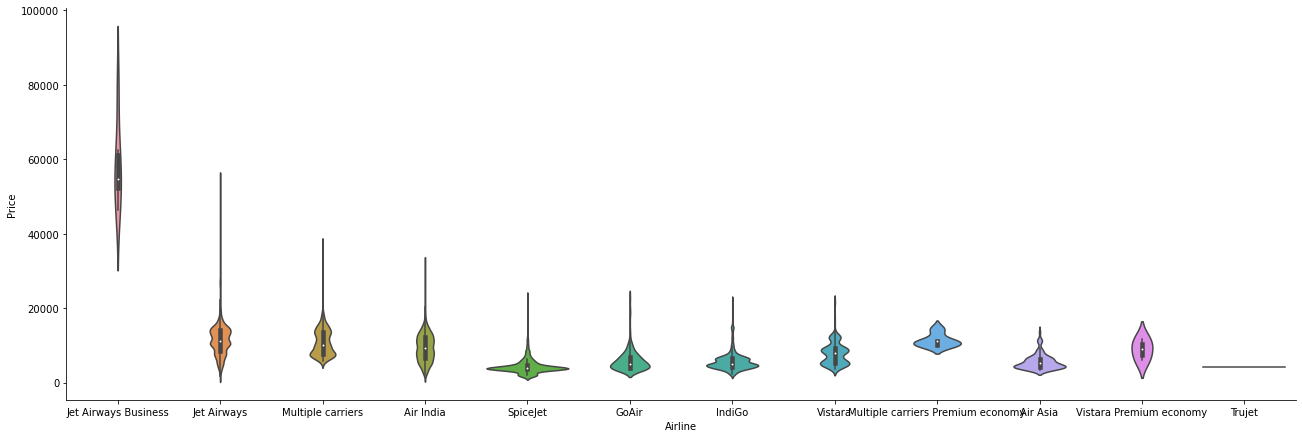

In [34]:
sns.catplot(y='Price',x='Airline',data=df.sort_values('Price',ascending=False),kind='violin',height=6, aspect=3)
plt.show()

jet airways business is the most expensive airline

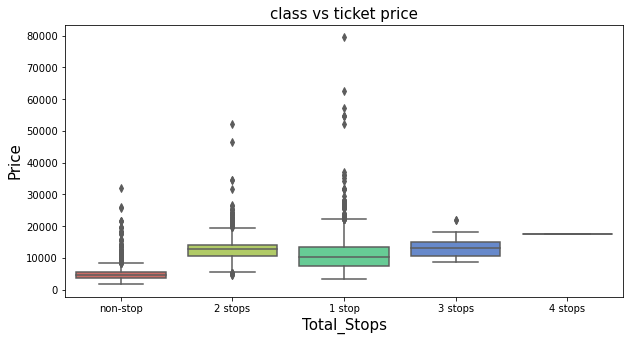

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Total_Stops',y='Price',data=df,palette = 'hls')
plt.title('class vs ticket price', fontsize=15)
plt.xlabel('Total_Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [36]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_mins,duration_hours,duration_mins,arrival_hour,arrival_minute
0,IndiGo,Banglore,New Delhi,BLR - DEL,non-stop,No info,3897,24,3,22,20,2,50,1,10
1,Air India,Kolkata,Banglore,CCU - IXR - BBI - BLR,2 stops,No info,7662,1,5,5,50,7,25,13,15
2,Jet Airways,Delhi,Cochin,DEL - LKO - BOM - COK,2 stops,No info,13882,9,6,9,25,19,0,4,25
3,IndiGo,Kolkata,Banglore,CCU - NAG - BLR,1 stop,No info,6218,12,5,18,5,5,25,23,30
4,IndiGo,Banglore,New Delhi,BLR - NAG - DEL,1 stop,No info,13302,1,3,16,50,4,45,21,35


# dealing with categorical data

In [37]:
# performing one hot encoding as the airline is nominal categorical data
Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline,drop_first = True)

In [38]:
# performing one hot encoding as the soruce is nominal categorical data
Source = df[['Source']]
Source = pd.get_dummies(Source,drop_first=True)

In [39]:
# performing one hot encoding as the destination is nominal categorical data
Destination = df[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)

In [40]:
# stop is an ordinal column so we will asign them label encoding
df.replace({'non-stop':0,'1 stop': 1,'2 stops':2, '3 stops':3,'4 stops':4}, inplace = True)

In [41]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_mins,duration_hours,duration_mins,arrival_hour,arrival_minute
0,IndiGo,Banglore,New Delhi,BLR - DEL,0,No info,3897,24,3,22,20,2,50,1,10
1,Air India,Kolkata,Banglore,CCU - IXR - BBI - BLR,2,No info,7662,1,5,5,50,7,25,13,15
2,Jet Airways,Delhi,Cochin,DEL - LKO - BOM - COK,2,No info,13882,9,6,9,25,19,0,4,25
3,IndiGo,Kolkata,Banglore,CCU - NAG - BLR,1,No info,6218,12,5,18,5,5,25,23,30
4,IndiGo,Banglore,New Delhi,BLR - NAG - DEL,1,No info,13302,1,3,16,50,4,45,21,35


In [42]:
df.drop(['Airline','Source','Destination','Route','Additional_Info'] ,axis = 1,inplace=True)

In [43]:
df.head()

,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_mins,duration_hours,duration_mins,arrival_hour,arrival_minute
0,0,3897,24,3,22,20,2,50,1,10
1,2,7662,1,5,5,50,7,25,13,15
2,2,13882,9,6,9,25,19,0,4,25
3,1,6218,12,5,18,5,5,25,23,30
4,1,13302,1,3,16,50,4,45,21,35


In [44]:
# concatenate dataframe -- df + airline + source + destination
df = pd.concat([df,Airline,Source,Destination],axis = 1)

In [45]:
df.head()

,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_mins,duration_hours,duration_mins,arrival_hour,arrival_minute,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,2,50,1,10,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,7,25,13,15,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,19,0,4,25,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,5,25,23,30,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,4,45,21,35,...,0,0,0,0,0,0,0,0,0,1


In [46]:
# separating x and y
x = df.drop(['Price'], axis = 1)
y = df.Price

In [47]:
x

,Total_Stops,journey_day,journey_month,Dep_hour,Dep_mins,duration_hours,duration_mins,arrival_hour,arrival_minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,2,50,1,10,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,7,25,13,15,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,19,0,4,25,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,5,25,23,30,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,4,45,21,35,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,2,30,22,25,0,...,0,0,0,1,0,0,0,0,0,0
10679,0,27,4,20,45,2,35,23,20,1,...,0,0,0,1,0,0,0,0,0,0
10680,0,27,4,8,20,3,0,11,20,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,11,30,2,40,14,10,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10462, dtype: int64

In [49]:
# splitting the data into train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state=100)

In [50]:
# splitting the data into train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.3 , random_state = 100)

In [51]:
x_train

,Total_Stops,journey_day,journey_month,Dep_hour,Dep_mins,duration_hours,duration_mins,arrival_hour,arrival_minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
10606,1,1,5,8,25,11,25,19,50,0,...,0,0,0,1,0,0,0,0,0,0
1056,0,18,5,8,20,3,0,11,20,0,...,0,0,0,0,0,0,1,0,0,0
5405,1,24,5,8,25,9,50,18,15,0,...,0,0,0,1,0,0,0,0,0,0
10155,1,18,5,10,35,14,55,1,30,0,...,0,0,1,0,0,1,0,0,0,0
4324,1,15,5,10,0,9,0,19,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,27,4,6,0,2,45,8,45,0,...,0,0,0,0,0,0,1,0,0,0
79,0,21,3,8,20,2,15,10,35,0,...,0,1,0,0,0,0,0,0,1,0
8153,3,9,5,5,15,38,0,19,15,1,...,0,0,1,0,0,1,0,0,0,0
7025,0,1,5,5,15,2,25,7,40,0,...,0,1,0,0,0,0,0,0,1,0


In [52]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew

In [53]:
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [54]:
# fit the model
m1 = sm.OLS(y_train,x_train).fit()

In [55]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     519.6
Date:                Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:00:50   Log-Likelihood:                -68526.
No. Observations:                7323   AIC:                         1.371e+05
Df Residuals:                    7298   BIC:                         1.373e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                      5799.9071    247.815     23.404      0.000    5314.118    6285.696
Total_Stops                                2793.4653     89.357     31.262      0.000    2618.301    2968.630
journey_day                                 -70.0724      3.937    -17.800      0.000     -77.789     -62.356
journey_month                              -401.8030     32.427    -12.391      0.000    -465.370    -338.236
Dep_hour                                     18.4773      5.939      3.111      0.002       6.836      30.119
Dep_mins                                     -2.3998      1.844     -1.301      0.193      -6.016       1.216
duration_hours                                4.7039      6.275      0.750      0.454      -7.597      17.005
duration_mins                                -1.0390      2.077     -0.500      0.617      -5.110       3.032
arrival_hour                                 -7.9370      4.962     -1.600      0.110     -17.664       1.790
arrival_minute                                1.6942      2.125      0.797      0.425      -2.471       5.859
Airline_Air India                          1694.4262    221.294      7.657      0.000    1260.626    2128.226
Airline_GoAir                                -9.9526    302.719     -0.033      0.974    -603.370     583.465
Airline_IndiGo                              350.5995    209.889      1.670      0.095     -60.844     762.043
Airline_Jet Airways                        4491.0915    208.115     21.580      0.000    4083.127    4899.056
Airline_Jet Airways Business               4.949e+04   1422.549     34.792      0.000    4.67e+04    5.23e+04
Airline_Multiple carriers                  3618.0745    229.249     15.782      0.000    3168.680    4067.469
Airline_Multiple carriers Premium economy  3937.0477    914.314      4.306      0.000    2144.728    5729.367
Airline_SpiceJet                           -142.6341    229.055     -0.623      0.533    -591.648     306.380
Airline_Trujet                            -3.094e-11   1.78e-12    -17.415      0.000   -3.44e-11   -2.75e-11
Airline_Vistara                            2104.4452    254.022      8.284      0.000    1606.489    2602.402
Airline_Vistara Premium economy            3708.7590   2000.601      1.854      0.064    -212.997    7630.515
Source_Chennai                              639.9803     89.293      7.167      0.000     464.940     815.021
Source_Delhi                                686.2252     51.695     13.274      0.000     584.887     787.563
Source_Kolkata                             1230.9598     92.852     13.257      0.000    1048.943    1412.976
Source_Mumbai                              -255.3242     69.560     -3.671      0.000    -391.681    -118.967
Des

In [56]:
ypred = m1.predict(x_test)

In [57]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,ypred)
r_squared = r2_score(y_test,ypred)

In [58]:
from math import sqrt
rsme = sqrt(mse)
rsme

2927.034305175903

In [59]:
print('Mean_Squared_Error:', mse)
print('Root_Mean_Squared_Error:', rsme)
print('r_squared_value:', r_squared)

Mean_Squared_Error: 8567529.823676579
Root_Mean_Squared_Error: 2927.034305175903
r_squared_value: 0.60351940764361


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

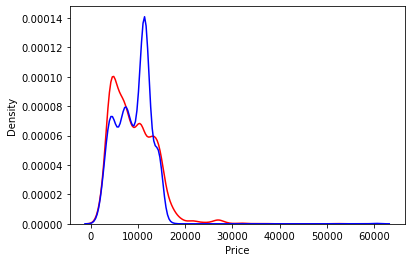

In [60]:
# plotting displot to analyse the actual and predicted values
ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Values')
sns.distplot(ypred, hist=False, color='b', label='Predicted Values', ax=ax1)

## fitting model using random forest

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [62]:
rf= RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

In [63]:
from sklearn.metrics import mean_absolute_error, r2_score

In [64]:
mse_rf = mean_squared_error(y_test,y_pred_rf)
rmse_rf = sqrt(mse_rf)

In [65]:
print('Mean_Squared_Error:', mse_rf)
print('Root_Mean_Squared_Error:', rmse_rf)

Mean_Squared_Error: 4517179.812348463
Root_Mean_Squared_Error: 2125.3658067138613


# decision tree

In [66]:
#Import the Decesion Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=100)

#Fit the Regressor
dt.model = dt.fit(x_train,y_train)

In [67]:
y_pred_dt = dt.predict(x_test)

#Model Evaluation using R2 for Decision Tree Regressor
from sklearn import metrics
r_sq = metrics.r2_score(y_test,y_pred_dt)
print("R_Sq associated with Decision tree regressor is:",r_sq )

R_Sq associated with Decision tree regressor is: 0.6871055521236559


In [68]:
from sklearn.metrics import mean_absolute_error, r2_score

In [69]:
mae = mean_absolute_error(y_test,y_pred_dt)
mae

1414.8572262928744

In [70]:
mse_dt = mean_squared_error(y_test,y_pred_dt)

rmse_dt = sqrt(mse_dt)
rmse_dt

2600.2540059985786

# Hyper parameter tuning

In [71]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [72]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [73]:
# random search of parameters, using 5 fold cross validation
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid, cv =10 , verbose = 2, n_jobs=4)

In [74]:
rf_random.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=4,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=2)

In [75]:
 rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [76]:
rf_model = RandomForestRegressor(**rf_random.best_params_)
rf_model.fit(x_train, y_train)
rf_ypred = rf.predict(x_test)
rf_mse = mean_squared_error(y_test, rf_ypred)
rf_rmse = sqrt(rf_mse)
print('Mean_Squared_Error:',rf_mse)
print('Root_Mean_Squared_Error',rf_rmse)

Mean_Squared_Error: 4517179.812348463
Root_Mean_Squared_Error 2125.3658067138613


In [77]:
prediction = rf_random.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


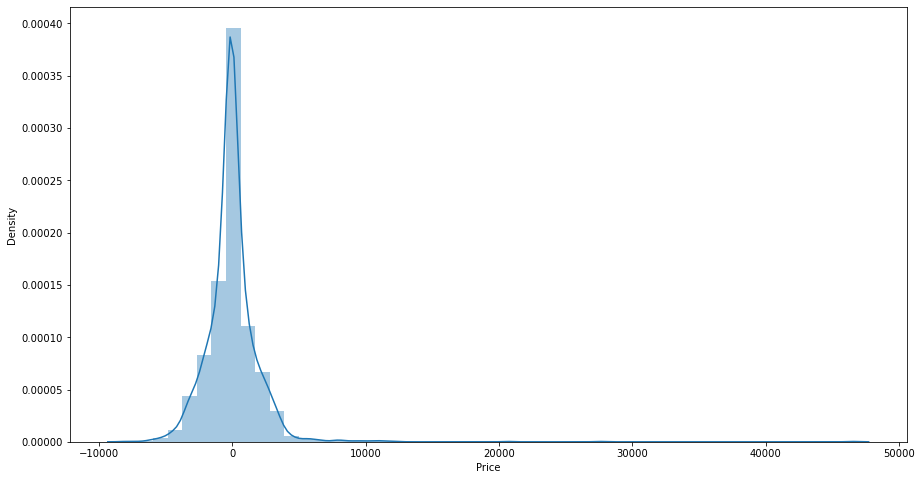

In [78]:
plt.figure(figsize = (15,8))
sns.distplot(y_test-prediction)
plt.show()

# XGB regressor

In [79]:
from xgboost import XGBRegressor

xg = XGBRegressor(eta=0.2,gamma=50)

#fit the model
xg_model = xg.fit(x_train,y_train)

xg_pred = xg_model.predict(x_test)

In [80]:
mse_xg = mean_squared_error(y_test,xg_pred)
rmse_xg = sqrt(mse_xg)

In [81]:
print('Mean_Squared_Error:', mse_xg)
print('Root_Mean_Squared_Error:', rmse_xg)

Mean_Squared_Error: 3432448.312475802
Root_Mean_Squared_Error: 1852.6867820751036


# extra trees and bagginh trees


In [82]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor

In [83]:
modelbag = BaggingRegressor()

In [84]:
# fit the model with train data
modelbag.fit(x_train,y_train)

BaggingRegressor()

In [85]:
# predict the model with test data
bag_pred = modelbag.predict(x_test)

In [86]:
bag_mse = mean_squared_error(y_test,bag_pred)
bag_rmse = sqrt(bag_mse)
print('Mean_Squared_Error:',bag_mse)
print('Root_Mean_Squared_Error',bag_rmse)

Mean_Squared_Error: 4955013.5280040335
Root_Mean_Squared_Error 2225.9859676116635


## EXTRA TREE REGRESSOR

In [88]:
xtra = ExtraTreesRegressor()

In [89]:
# fit the model with train data
xtra.fit(x_train,y_train)


ExtraTreesRegressor()

In [90]:
# predict the model with test data
xtra_pred = xtra.predict(x_test)

In [91]:
xtra_mse = mean_squared_error(y_test, xtra_pred)
xtra_rmse = sqrt(xtra_mse)
print('mean_squared_error:',xtra_mse)
print('root_mean_squared_error:',xtra_rmse)

mean_squared_error: 4617451.151826896
root_mean_squared_error: 2148.8255284752404


# support vector regressor

In [92]:
from sklearn.svm import SVR

In [93]:
svr = SVR()

In [94]:
# FIT THE MODEL WITH TRAIN DATA
svr.fit(x_train,y_train)

SVR()

In [95]:


# predict the model with test data
svr_pred = svr.predict(x_test)

In [96]:
svr_mse = mean_squared_error(y_test, svr_pred)
svr_rmse = sqrt(svr_mse)
print('mean_squared_error:',svr_mse)
print('root_mean_squared_error:',svr_rmse)

mean_squared_error: 21723747.556815185
root_mean_squared_error: 4660.874119391682


# checking the model performance

In [97]:
model_ev = pd.DataFrame({'Model': ['Linear Regression','Decision Tree',
                    'Random Forest','XGBoost','extra tree','svr'], 'RMSE': [rsme,
                    rmse_dt,rmse_rf,rmse_xg,xtra_rmse,svr_rmse]}) 
model_ev

,Model,RMSE
0,Linear Regression,2927.034305
1,Decision Tree,2600.254006
2,Random Forest,2125.365807
3,XGBoost,1852.686782
4,extra tree,2148.825528
5,svr,4660.874119


In [99]:
#Trainig the model with
xg_model.fit(x_train, y_train)
    
# Predict the model with test data

y_pred = xtra.predict(x_test)

In [100]:
# make c copy 
df1=df.copy()

In [101]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df1.merge(out,left_index=True,right_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

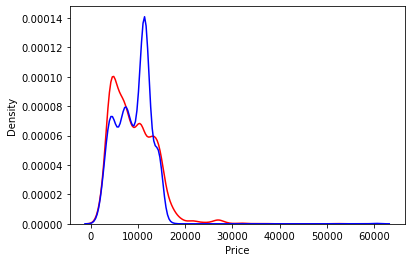

In [102]:
ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Values')
sns.distplot(ypred, hist=False, color='b', label='Predicted Values', ax=ax1)

In [103]:
result.head()

,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_mins,duration_hours,duration_mins,arrival_hour,arrival_minute,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price_actual,Price_pred
1,2,7662,1,5,5,50,7,25,13,15,...,0,1,0,0,0,0,0,0,7662,8866.64
3,1,6218,12,5,18,5,5,25,23,30,...,0,1,0,0,0,0,0,0,6218,6252.18
10,1,8907,1,6,9,45,13,15,23,0,...,1,0,0,1,0,0,0,0,8907,8942.39
12,0,4667,24,6,11,40,2,15,13,55,...,0,0,0,0,0,0,1,0,4667,4636.90
21,1,6955,21,3,22,0,15,20,13,20,...,0,0,0,0,0,0,0,1,6955,5961.75
